# Задание №4

Для ответа на вопрос, сколько Sports.ru заработал за месяц в каждом из приложений, необходимо посчитать выручку каждого приложения.

Автор - **Дасаев Гарри**

Загружаем необходимые модули.

In [ ]:
import numpy as np # для математических операций с векторами и матрицами
import pandas as pd # для работы с датафреймами

Загружаем необходимый исходный файл с данными.

In [ ]:
df_apps = pd.read_excel("test 2.xlsx", sep = ',')

Подсмотрим на то, правильно ли загрузился датафрейм.

In [128]:
df_apps.head(7)

,Date,App ID,App Name,Platform,Display Format,Requests,Filled Requests,Fill Rate,Impressions,Show Rate,Clicks,CTR,Average CPM,Revenue
0,2019-06-30 00:00:00,496836757556346,Мордовия,android,interstitial,61601,52262,0.747395,44170,0.745356,625,0.014147,1.913332,34.532731
1,2019-06-15 00:00:00,496836757556346,Мордовия,android,interstitial,32622,61133,0.742403,51173,0.736303,625,0.012210,1.600131,31.907964
2,2019-06-18 00:00:00,496836757556346,Мордовия,android,native,536473,476941,0.903643,276279,0.573934,1436,0.005156,0.356970,102.199454
3,2019-06-08 00:00:00,228272480695675,Удмуртия,ios,interstitial,50791,41796,0.723250,37150,0.910577,135,0.004573,2.023160,77.336152
4,2019-06-23 00:00:00,228272480695675,Удмуртия,ios,interstitial,19496,16366,0.739454,15022,0.913738,71,0.005392,2.533317,33.115591
5,2019-06-24 00:00:00,496836757556346,Мордовия,ios,interstitial,9369,3960,0.714722,6747,0.760302,39,0.005695,3.696697,25.314991
6,2019-06-04 00:00:00,496836757556346,Мордовия,ios,interstitial,15209,12513,0.722337,10753,0.763654,52,0.004380,3.942909,42.303166


Удостоверимся правильно ли pandas прочитал переменные.

In [118]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 14 columns):
Date               2412 non-null object
App ID             2412 non-null int64
App Name           2412 non-null object
Platform           2412 non-null object
Display Format     2412 non-null object
Requests           2412 non-null int64
Filled Requests    2412 non-null int64
Fill Rate          2412 non-null float64
Impressions        2412 non-null int64
Show Rate          2412 non-null float64
Clicks             2412 non-null int64
CTR                2412 non-null float64
Average CPM        2412 non-null float64
Revenue            2412 non-null float64
dtypes: float64(5), int64(5), object(4)
memory usage: 263.9+ KB


Проверим сколько уникальных наблюдений представлено в столбце "Дата". Нам нужны данные только за 1 месяц.

In [119]:
df_apps['Date'].nunique()

31

In [120]:
df_apps['Date'].unique()

array([datetime.datetime(2019, 6, 30, 0, 0),
       datetime.datetime(2019, 6, 15, 0, 0),
       datetime.datetime(2019, 6, 18, 0, 0),
       datetime.datetime(2019, 6, 8, 0, 0),
       datetime.datetime(2019, 6, 23, 0, 0),
       datetime.datetime(2019, 6, 24, 0, 0),
       datetime.datetime(2019, 6, 4, 0, 0),
       datetime.datetime(2019, 6, 2, 0, 0),
       datetime.datetime(2019, 6, 17, 0, 0),
       datetime.datetime(2019, 6, 16, 0, 0),
       datetime.datetime(2019, 6, 6, 0, 0),
       datetime.datetime(2019, 6, 10, 0, 0),
       datetime.datetime(2019, 6, 5, 0, 0),
       datetime.datetime(2019, 6, 27, 0, 0),
       datetime.datetime(2019, 6, 20, 0, 0),
       datetime.datetime(2019, 6, 13, 0, 0),
       datetime.datetime(2019, 6, 25, 0, 0),
       datetime.datetime(2019, 6, 29, 0, 0), '2019-06-31',
       datetime.datetime(2019, 6, 26, 0, 0),
       datetime.datetime(2019, 6, 12, 0, 0),
       datetime.datetime(2019, 6, 14, 0, 0),
       datetime.datetime(2019, 6, 9, 0, 0),
  

В столбце "Дата" присутствует лишнее значение: "2019-06-31". В июне 30 дней, поэтому удаляем "нереальное" значение даты.

In [121]:
df_apps_clean = df_apps.loc[df_apps.Date != "2019-06-31"].reset_index()

Теперь проверим число уникальных значений для даты в новом датафрейме:

In [122]:
df_apps_clean['Date'].nunique()

30

30 дней в июне. 
Теперь даты совпадают с реальностью, и можно переходить к подсчету выручки каждого приложения.

In [123]:
apps_revenues = (df_apps_clean.groupby(['App Name'])['Revenue']
                 .agg(np.sum)).reset_index()

Давайте посмотрим на датафрейм со значением выручки для каждого из приложений.

In [124]:
apps_revenues

,App Name,Revenue
0,Адыгея,966.504660
1,Башкортостан,2305.945366
2,Бурятия,2132.167986
3,Дагестан,1161.014108
4,Дагестан 2018,948.539051
5,Ингушетия,2018.814922
6,Калмыкия,171.029409
7,Карелия,965.832531
8,Карелия 2018,786.818339
9,Коми,3.390599


Отсортируем датафрейм по убыванию выручки.

In [125]:
apps_revenues.sort_values('Revenue', ascending=False).reset_index().drop("index", axis=1)

,App Name,Revenue
0,Мордовия,6203.275781
1,Удмуртия,3949.864479
2,Татарстан,2451.906956
3,Башкортостан,2305.945366
4,Бурятия,2132.167986
5,Ингушетия,2018.814922
6,Дагестан,1161.014108
7,Адыгея,966.504660
8,Карелия,965.832531
9,Дагестан 2018,948.539051


Можно выгрузить датафрейм в файл Excel формата xlsx (тот же формат, в котором был получен исходный датафрейм).

In [ ]:
apps_revenues.to_excel("app_revenues.xlsx", encoding = "UTF-8")

### Дополнительно 
(чисто из спортивного интереса)

Интересно визуализировать распределения выручки приложений Sports.ru

In [130]:
import matplotlib.pyplot as plt

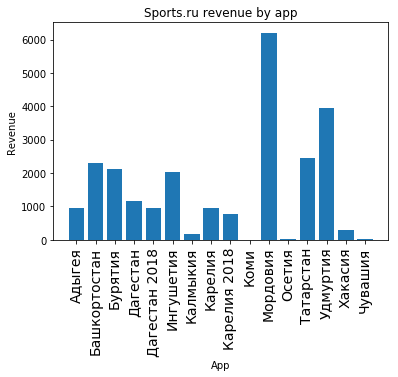

In [126]:
index = np.arange(len(apps_revenues['App Name']))
plt.bar(index, apps_revenues['Revenue'])
plt.xlabel('App', fontsize=10)
plt.ylabel('Revenue', fontsize=10)
plt.xticks(index, apps_revenues['App Name'], fontsize=14, rotation=90)
plt.title('Sports.ru revenue by app')
plt.show()

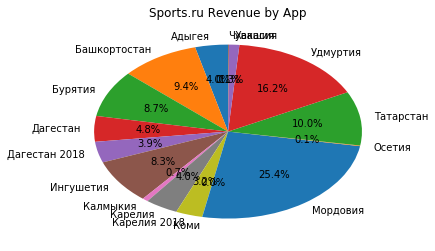

In [127]:
plt.pie(apps_revenues['Revenue'], labels = apps_revenues['App Name'], 
        startangle=90, autopct='%.1f%%')
plt.title('Sports.ru Revenue by App')
plt.show()

Интересно заметить, что более 50% выручки приносят три приложения:
1. Мордовия
2. Удмуртия
3. Татарстан